In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2,f_classif


In [5]:
df=pd.read_csv("../data/processed/data_v1.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221948 entries, 0 to 1221947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1221948 non-null  float64
 1   TP3              1221948 non-null  float64
 2   H1               1221948 non-null  float64
 3   DV_pressure      1221948 non-null  float64
 4   Reservoirs       1221948 non-null  float64
 5   Oil_temperature  1221948 non-null  float64
 6   Motor_current    1221948 non-null  float64
 7   COMP             1221948 non-null  float64
 8   DV_eletric       1221948 non-null  float64
 9   Towers           1221948 non-null  float64
 10  MPG              1221948 non-null  float64
 11  LPS              1221948 non-null  float64
 12  Pressure_switch  1221948 non-null  float64
 13  Oil_level        1221948 non-null  float64
 14  Caudal_impulses  1221948 non-null  float64
 15  Air_Leak         1221948 non-null  int64  
dtypes: float64(15), in

In [7]:
df["Air_Leak"].value_counts()

Air_Leak
0    1196741
1      25207
Name: count, dtype: int64

In [8]:
# df.drop(columns=["timestamp","Unnamed: 0"],inplace=True)


In [9]:
x=df.drop(columns=["Air_Leak"])
y=df["Air_Leak"]

In [10]:
# Use ANOVA F-value for feature selection
selector = SelectKBest(score_func=f_classif, k=10)  
X_new = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]

print("Selected features using ANOVA F-value:", selected_features)

Selected features using ANOVA F-value: Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Oil_temperature', 'Motor_current',
       'COMP', 'DV_eletric', 'Towers', 'MPG'],
      dtype='object')


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Create the RFE model and select the top features
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(x, y)

# Get the selected feature names
selected_features_rfe = x.columns[rfe.support_]
print("Selected features (RFE):", selected_features_rfe)


Selected features (RFE): Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'LPS'],
      dtype='object')


In [12]:
# Fit a Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(x, y)

# Get feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,DV_pressure,0.302983
5,Oil_temperature,0.236148
1,TP3,0.121208
4,Reservoirs,0.112428
0,TP2,0.082670
2,H1,0.061129
6,Motor_current,0.045350
10,MPG,0.010294
7,COMP,0.009530
8,DV_eletric,0.008928


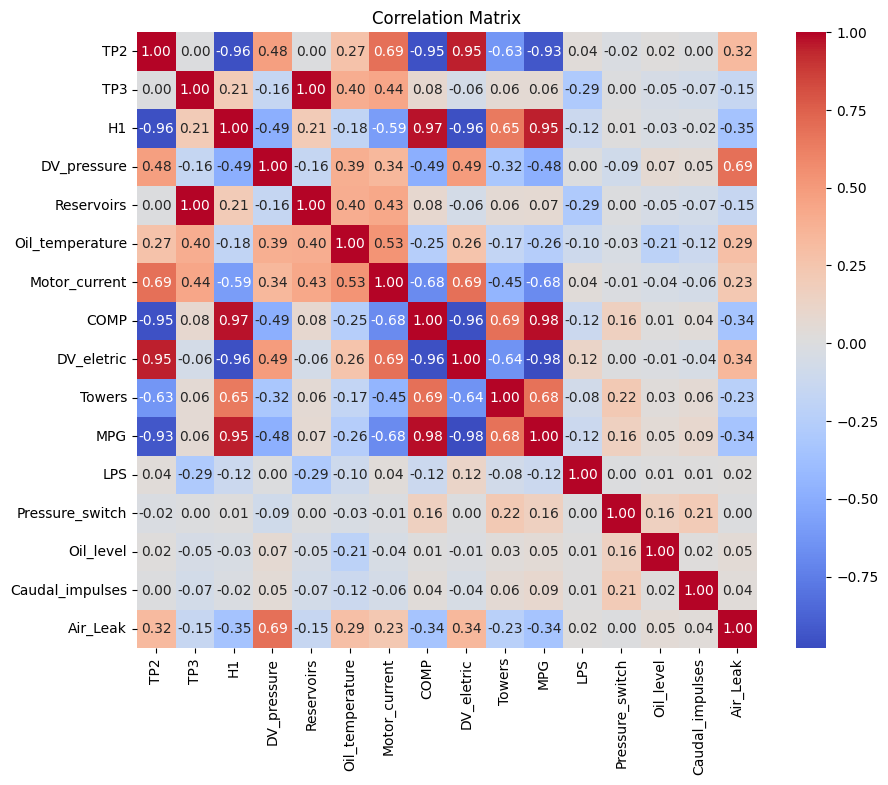

In [10]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()


In [11]:
df.drop(columns=["Reservoirs","COMP","Caudal_impulses","Pressure_switch","H1"],inplace=True)

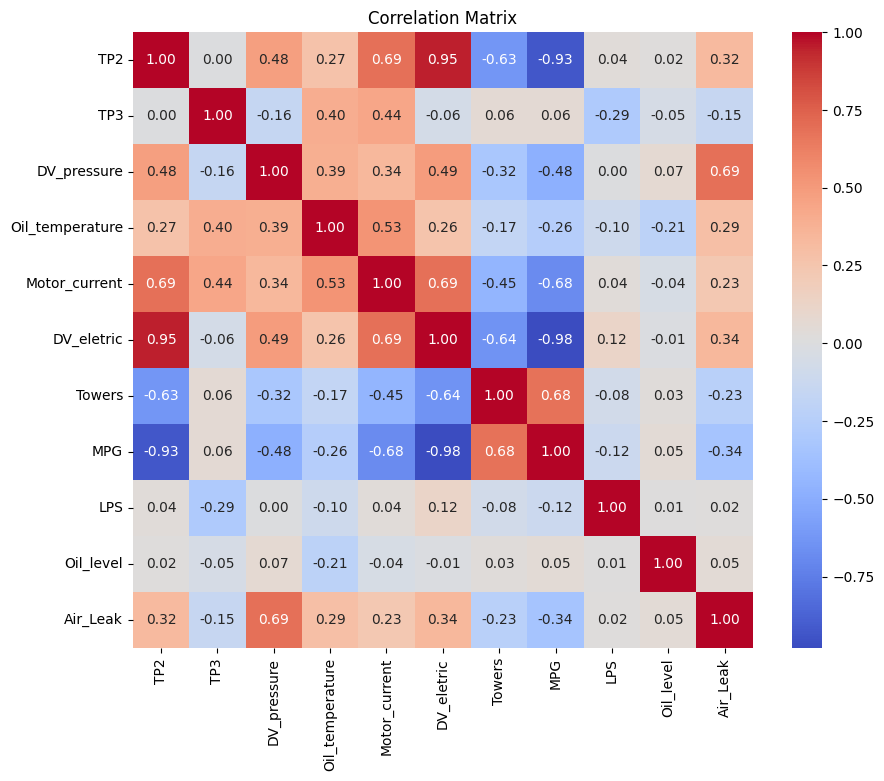

In [12]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()
